# __Análise exploratória dos datasets__

Esse notebook tem por objetivo documentar o processo de análise exploratória de um dataset com as músicas mais populates da rede social TikTok nos últimos anos. Pretendemos explorar e destrinchar os dados, procurando por relações entre os atributos das músicas e a popularidade delas, tentando estabelecer, principalmente, relações de causalidade (se possível).

---

#### __Grupo:__

Daniel Barreto Torres - 2018432952

Gabriela Tavares Barreto - 2018074657

Guilherme Lucas Giudice Silva - 2020006604

Mirna Mendonça e Silva - 2021421940

Vinicius Silva Gomes - 2021421869

In [1]:
import numpy as np
import pandas as pd

import math

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

plt.rcParams['figure.figsize']  = (8, 5)
plt.rcParams['axes.labelsize']  = 8
plt.rcParams['axes.titlesize']  = 8
plt.rcParams['legend.fontsize'] = 8
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['lines.linewidth'] = 2

plt.ion()
plt.style.use('seaborn-colorblind')

sns.set_theme(style="whitegrid")

In [2]:
# Carrega os databases. O primeiro será usado para análise efetivamente e o segundo para encontrar as demais
# informações de uma música específica se necessário.

numerical_df = pd.read_csv('../data/numeric_columns.csv')
tiktok_df = pd.read_csv('../data/tiktok_clean.csv')

In [3]:
numerical_df.head()

track_id  duration  popularity  danceability  energy  key  \
0  6kVuF2PYLuvl9T85XjNbaO    302186          28         0.597   0.800    1   
1  1RGIjMFMgJxkZHMDXVYzOJ    238800          75         0.832   0.391    8   
2  1dIWPXMX4kRHj6Dt2DStUQ    161684          76         0.571   0.767    2   
3  4QVS8YCpK71R4FsxSMCjhP    218295          72         0.548   0.839    6   
4  7BoobGhD4x5K96Me0hqC8Q    122772          89         0.855   0.463    3   

   loudness  mode  speechiness  acousticness  instrumentalness  liveness  \
0    -5.423     0       0.3120        0.0461          0.000000    0.1800   
1    -8.504     1       0.0628        0.0564          0.000000    0.2240   
2    -5.160     1       0.2870        0.3360          0.000000    0.0809   
3    -2.371     1       0.0644        0.1350          0.000000    0.1020   
4    -7.454     1       0.0367        0.2170          0.000018    0.3470   

   valence    tempo  duration_mins  release_year  
0    0.565  155.932       5.036433          2011  
1    0.436  104.961       3.980000          2007  
2    0.605   93.421       2.694733          2020  
3    0.314   98.932       3.638250          2018  
4    0.866  102.931       2.046200          2021

In [4]:
numerical_df.tail()

track_id  duration  popularity  danceability  energy  key  \
4024  1lNHWPDvKEbamKezpLq7HW    160346          64         0.788   0.473    0   
4025  7gd01LMH2gBcoDngSt8sq9    265813          70         0.670   0.676    8   
4026  5PYQUBXc7NYeI1obMKSJK0    223523          77         0.770   0.882    8   
4027  37f4ITSlgPX81ad2EvmVQr    204013          79         0.564   0.714    7   
4028  60jpDubMmVyR5molJp2TCm    175813          19         0.791   0.733    9   

      loudness  mode  speechiness  acousticness  instrumentalness  liveness  \
4024   -12.744     1       0.0328        0.4890          0.254000    0.1090   
4025    -4.725     1       0.0370        0.0201          0.000000    0.1100   
4026    -4.792     1       0.0602        0.1940          0.000000    0.3160   
4027    -4.987     1       0.1290        0.0549          0.000000    0.1550   
4028    -3.852     1       0.3500        0.0305          0.000169    0.0423   

      valence    tempo  duration_mins  release_year  
4024    0.810  105.429       2.672433          2020  
4025    0.349  114.974       4.430217          2011  
4026    0.385   99.991       3.725383          2019  
4027    0.330  175.924       3.400217          2016  
4028    0.913  159.974       2.930217          2020

In [5]:
numerical_df.describe()

duration   popularity  danceability       energy          key  \
count    4029.000000  4029.000000   4029.000000  4029.000000  4029.000000   
mean   193154.008935    55.348474      0.726902     0.633814     5.250434   
std     56955.259133    22.061397      0.140520     0.179224     3.675529   
min     43426.000000     1.000000      0.150000     0.023700     0.000000   
25%    156195.000000    42.000000      0.648000     0.514000     1.000000   
50%    186460.000000    60.000000      0.742000     0.641000     5.000000   
75%    222093.000000    72.000000      0.830000     0.768000     8.000000   
max    632625.000000   100.000000      0.990000     0.999000    11.000000   

          loudness         mode  speechiness  acousticness  instrumentalness  \
count  4029.000000  4029.000000  4029.000000   4029.000000       4029.000000   
mean     -6.907568     0.583768     0.136890      0.213532          0.037413   
std       2.945024     0.492994     0.126596      0.235999          0.146924   
min     -26.888000     0.000000     0.023200      0.000010          0.000000   
25%      -8.424000     0.000000     0.046400      0.030100          0.000000   
50%      -6.456000     1.000000     0.082300      0.121000          0.000001   
75%      -4.902000     1.000000     0.194000      0.314000          0.000307   
max       1.077000     1.000000     0.911000      0.991000          0.962000   

          liveness      valence        tempo  duration_mins  release_year  
count  4029.000000  4029.000000  4029.000000    4029.000000   4029.000000  
mean      0.181555     0.536508   120.695360       3.219233   2017.496897  
std       0.137107     0.233558    26.113913       0.949254      5.778543  
min       0.020000     0.033100    54.367000       0.723767   1960.000000  
25%       0.093900     0.358000   100.062000       2.603250   2018.000000  
50%       0.124000     0.537000   121.294000       3.107667   2020.000000  
75%       0.236000     0.724000   134.989000       3.701550   2020.000000  
max       0.952000     0.998000   216.053000      10.543750   2021.000000

In [6]:
for col_name in numerical_df.drop('track_id', axis=1):
    col = numerical_df.drop('track_id', axis=1)[col_name]
    rng = col.max() - col.min()
    var = col.var(ddof=1)
    std = col.std(ddof=1)
    print('\n{}:\n - Range: {:.2f}\n - Variance: {:.2f}\n - Std.Dev: {:.2f}'.format(col_name, rng, var, std))


duration:
 - Range: 589199.00
 - Variance: 3243901542.95
 - Std.Dev: 56955.26

popularity:
 - Range: 99.00
 - Variance: 486.71
 - Std.Dev: 22.06

danceability:
 - Range: 0.84
 - Variance: 0.02
 - Std.Dev: 0.14

energy:
 - Range: 0.98
 - Variance: 0.03
 - Std.Dev: 0.18

key:
 - Range: 11.00
 - Variance: 13.51
 - Std.Dev: 3.68

loudness:
 - Range: 27.97
 - Variance: 8.67
 - Std.Dev: 2.95

mode:
 - Range: 1.00
 - Variance: 0.24
 - Std.Dev: 0.49

speechiness:
 - Range: 0.89
 - Variance: 0.02
 - Std.Dev: 0.13

acousticness:
 - Range: 0.99
 - Variance: 0.06
 - Std.Dev: 0.24

instrumentalness:
 - Range: 0.96
 - Variance: 0.02
 - Std.Dev: 0.15

liveness:
 - Range: 0.93
 - Variance: 0.02
 - Std.Dev: 0.14

valence:
 - Range: 0.96
 - Variance: 0.05
 - Std.Dev: 0.23

tempo:
 - Range: 161.69
 - Variance: 681.94
 - Std.Dev: 26.11

duration_mins:
 - Range: 9.82
 - Variance: 0.90
 - Std.Dev: 0.95

release_year:
 - Range: 61.00
 - Variance: 33.39
 - Std.Dev: 5.78


Aqui serão gerados alguns gráficos e métricas que estudamos na análise exploratória dos dados. Esses gráficos ajudam a entender o comportamento dos dados e ajudam a tentar estabelecer padrões e a responder as perguntas que estamos interessados sobre os dados.

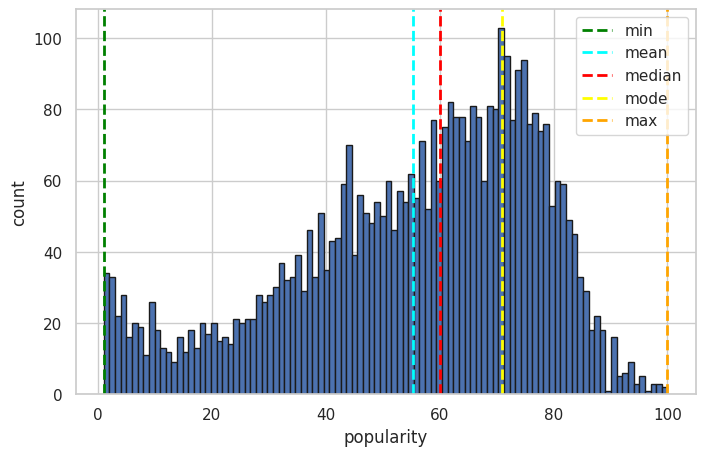

In [7]:
popularity = numerical_df['popularity']

plt.hist(popularity, edgecolor='k', bins = 100)
plt.xlabel('popularity')
plt.ylabel('count')

min_pop = popularity.min()
max_pop = popularity.max()
mean_pop = popularity.mean()
median_pop = popularity.median()
mode_pop = popularity.mode()[0]

# Linhas para cada estatística
plt.axvline(x=min_pop, color = 'green', linestyle='dashed', linewidth = 2, label='min')
plt.axvline(x=mean_pop, color = 'cyan', linestyle='dashed', linewidth = 2, label='mean')
plt.axvline(x=median_pop, color = 'red', linestyle='dashed', linewidth = 2, label='median')
plt.axvline(x=mode_pop, color = 'yellow', linestyle='dashed', linewidth = 2, label='mode')
plt.axvline(x=max_pop, color = 'orange', linestyle='dashed', linewidth = 2, label='max')

# Adiciona uma legenda
plt.legend(loc=0)

Duração mínima (minutos): 0.72
Duração máxima (minutos): 10.54


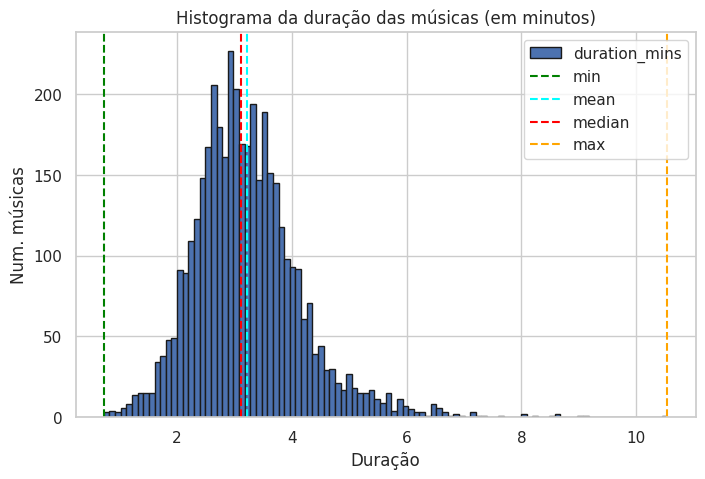

In [8]:
min_dur = numerical_df['duration_mins'].min()
max_dur = numerical_df['duration_mins'].max()
mean_dur = numerical_df['duration_mins'].mean()
median_dur = numerical_df['duration_mins'].median()

print("Duração mínima (minutos):", round(min_dur, 2))
print("Duração máxima (minutos):", round(max_dur, 2))

numerical_df.plot.hist(y='duration_mins', edgecolor='k', bins = 100)
plt.title('Histograma da duração das músicas (em minutos)')
plt.xlabel('Duração')
plt.ylabel('Num. músicas')

plt.axvline(min_dur, color = 'green', linestyle='dashed', label='min')
plt.axvline(mean_dur, color = 'cyan', linestyle='dashed', label='mean')
plt.axvline(median_dur, color = 'red', linestyle='dashed', label='median')
plt.axvline(max_dur, color = 'orange', linestyle='dashed', label='max')

plt.legend(loc=1)

Ano de lançamento da música mais antiga: 1960
Ano de lançamento da música mais recente: 2021


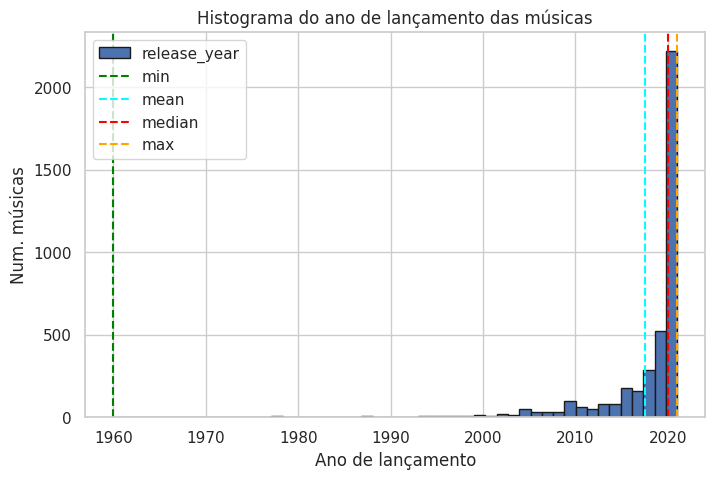

In [9]:
min_year = numerical_df['release_year'].min()
max_year = numerical_df['release_year'].max()
mean_year = numerical_df['release_year'].mean()
median_year = numerical_df['release_year'].median()

print("Ano de lançamento da música mais antiga:", min_year)
print("Ano de lançamento da música mais recente:", max_year)

numerical_df.plot.hist(y='release_year', edgecolor='k', bins = 50)
plt.title('Histograma do ano de lançamento das músicas')
plt.xlabel('Ano de lançamento')
plt.ylabel('Num. músicas')

plt.axvline(min_year, color = 'green', linestyle='dashed', label='min')
plt.axvline(mean_year, color = 'cyan', linestyle='dashed', label='mean')
plt.axvline(median_year, color = 'red', linestyle='dashed', label='median')
plt.axvline(max_year, color = 'orange', linestyle='dashed', label='max')

plt.legend(loc=2)

Text(0, 0.5, 'Popularidade')

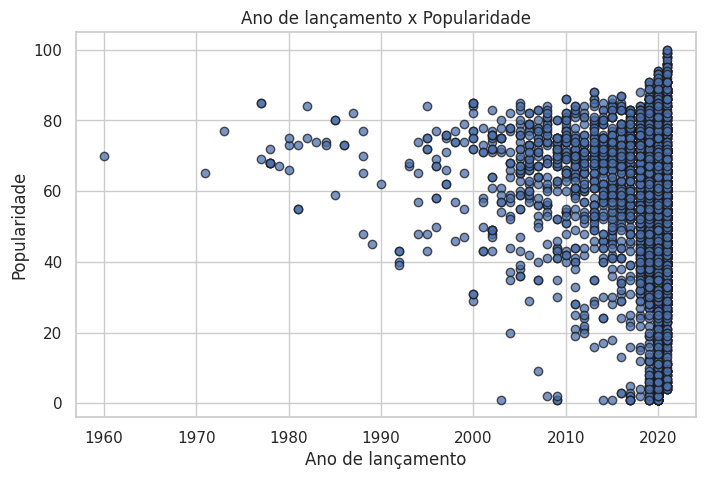

In [10]:
plt.scatter(numerical_df['release_year'], numerical_df['popularity'], edgecolor='k', alpha=0.75)
plt.title('Ano de lançamento x Popularidade')
plt.xlabel('Ano de lançamento')
plt.ylabel('Popularidade')

Text(0, 0.5, 'Popularidade')

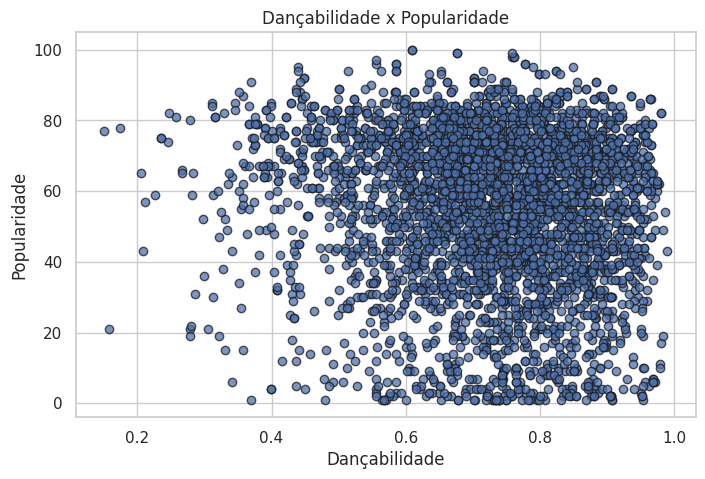

In [11]:
plt.scatter(numerical_df['danceability'], numerical_df['popularity'], edgecolor='k', alpha=0.75)
plt.title('Dançabilidade x Popularidade')
plt.xlabel('Dançabilidade')
plt.ylabel('Popularidade')

Text(0, 0.5, 'Popularidade')

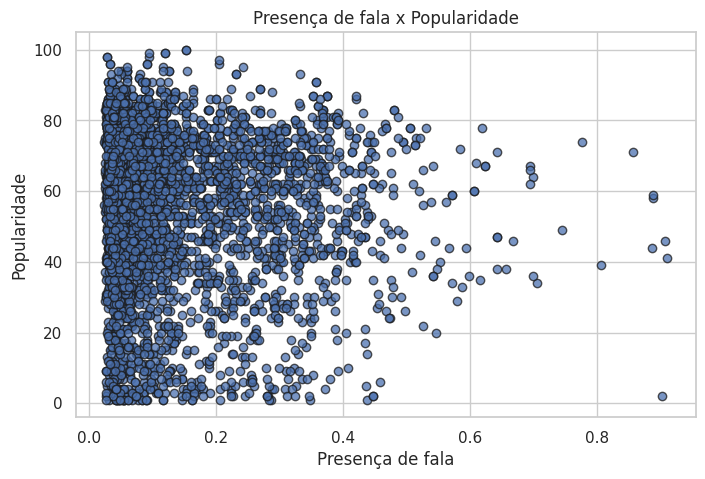

In [12]:
# Speechiness é uma métrica que mede a presença de palavras faladas na track, valores altos
# indicam que ela é composta majoriatariamente por fala (podcasts, etc) e valores baixos
# remetem a músicas ou músicas do tipo sem fala

plt.scatter(numerical_df['speechiness'], numerical_df['popularity'], edgecolor='k', alpha=0.75)
plt.title('Presença de fala x Popularidade')
plt.xlabel('Presença de fala')
plt.ylabel('Popularidade')

Text(0, 0.5, 'Popularidade')

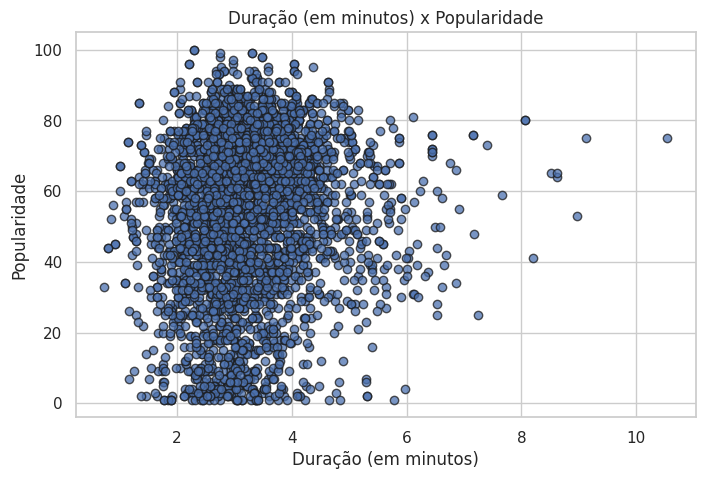

In [13]:
plt.scatter(numerical_df['duration_mins'], numerical_df['popularity'], edgecolor='k', alpha=0.75)
plt.title('Duração (em minutos) x Popularidade')
plt.xlabel('Duração (em minutos)')
plt.ylabel('Popularidade')

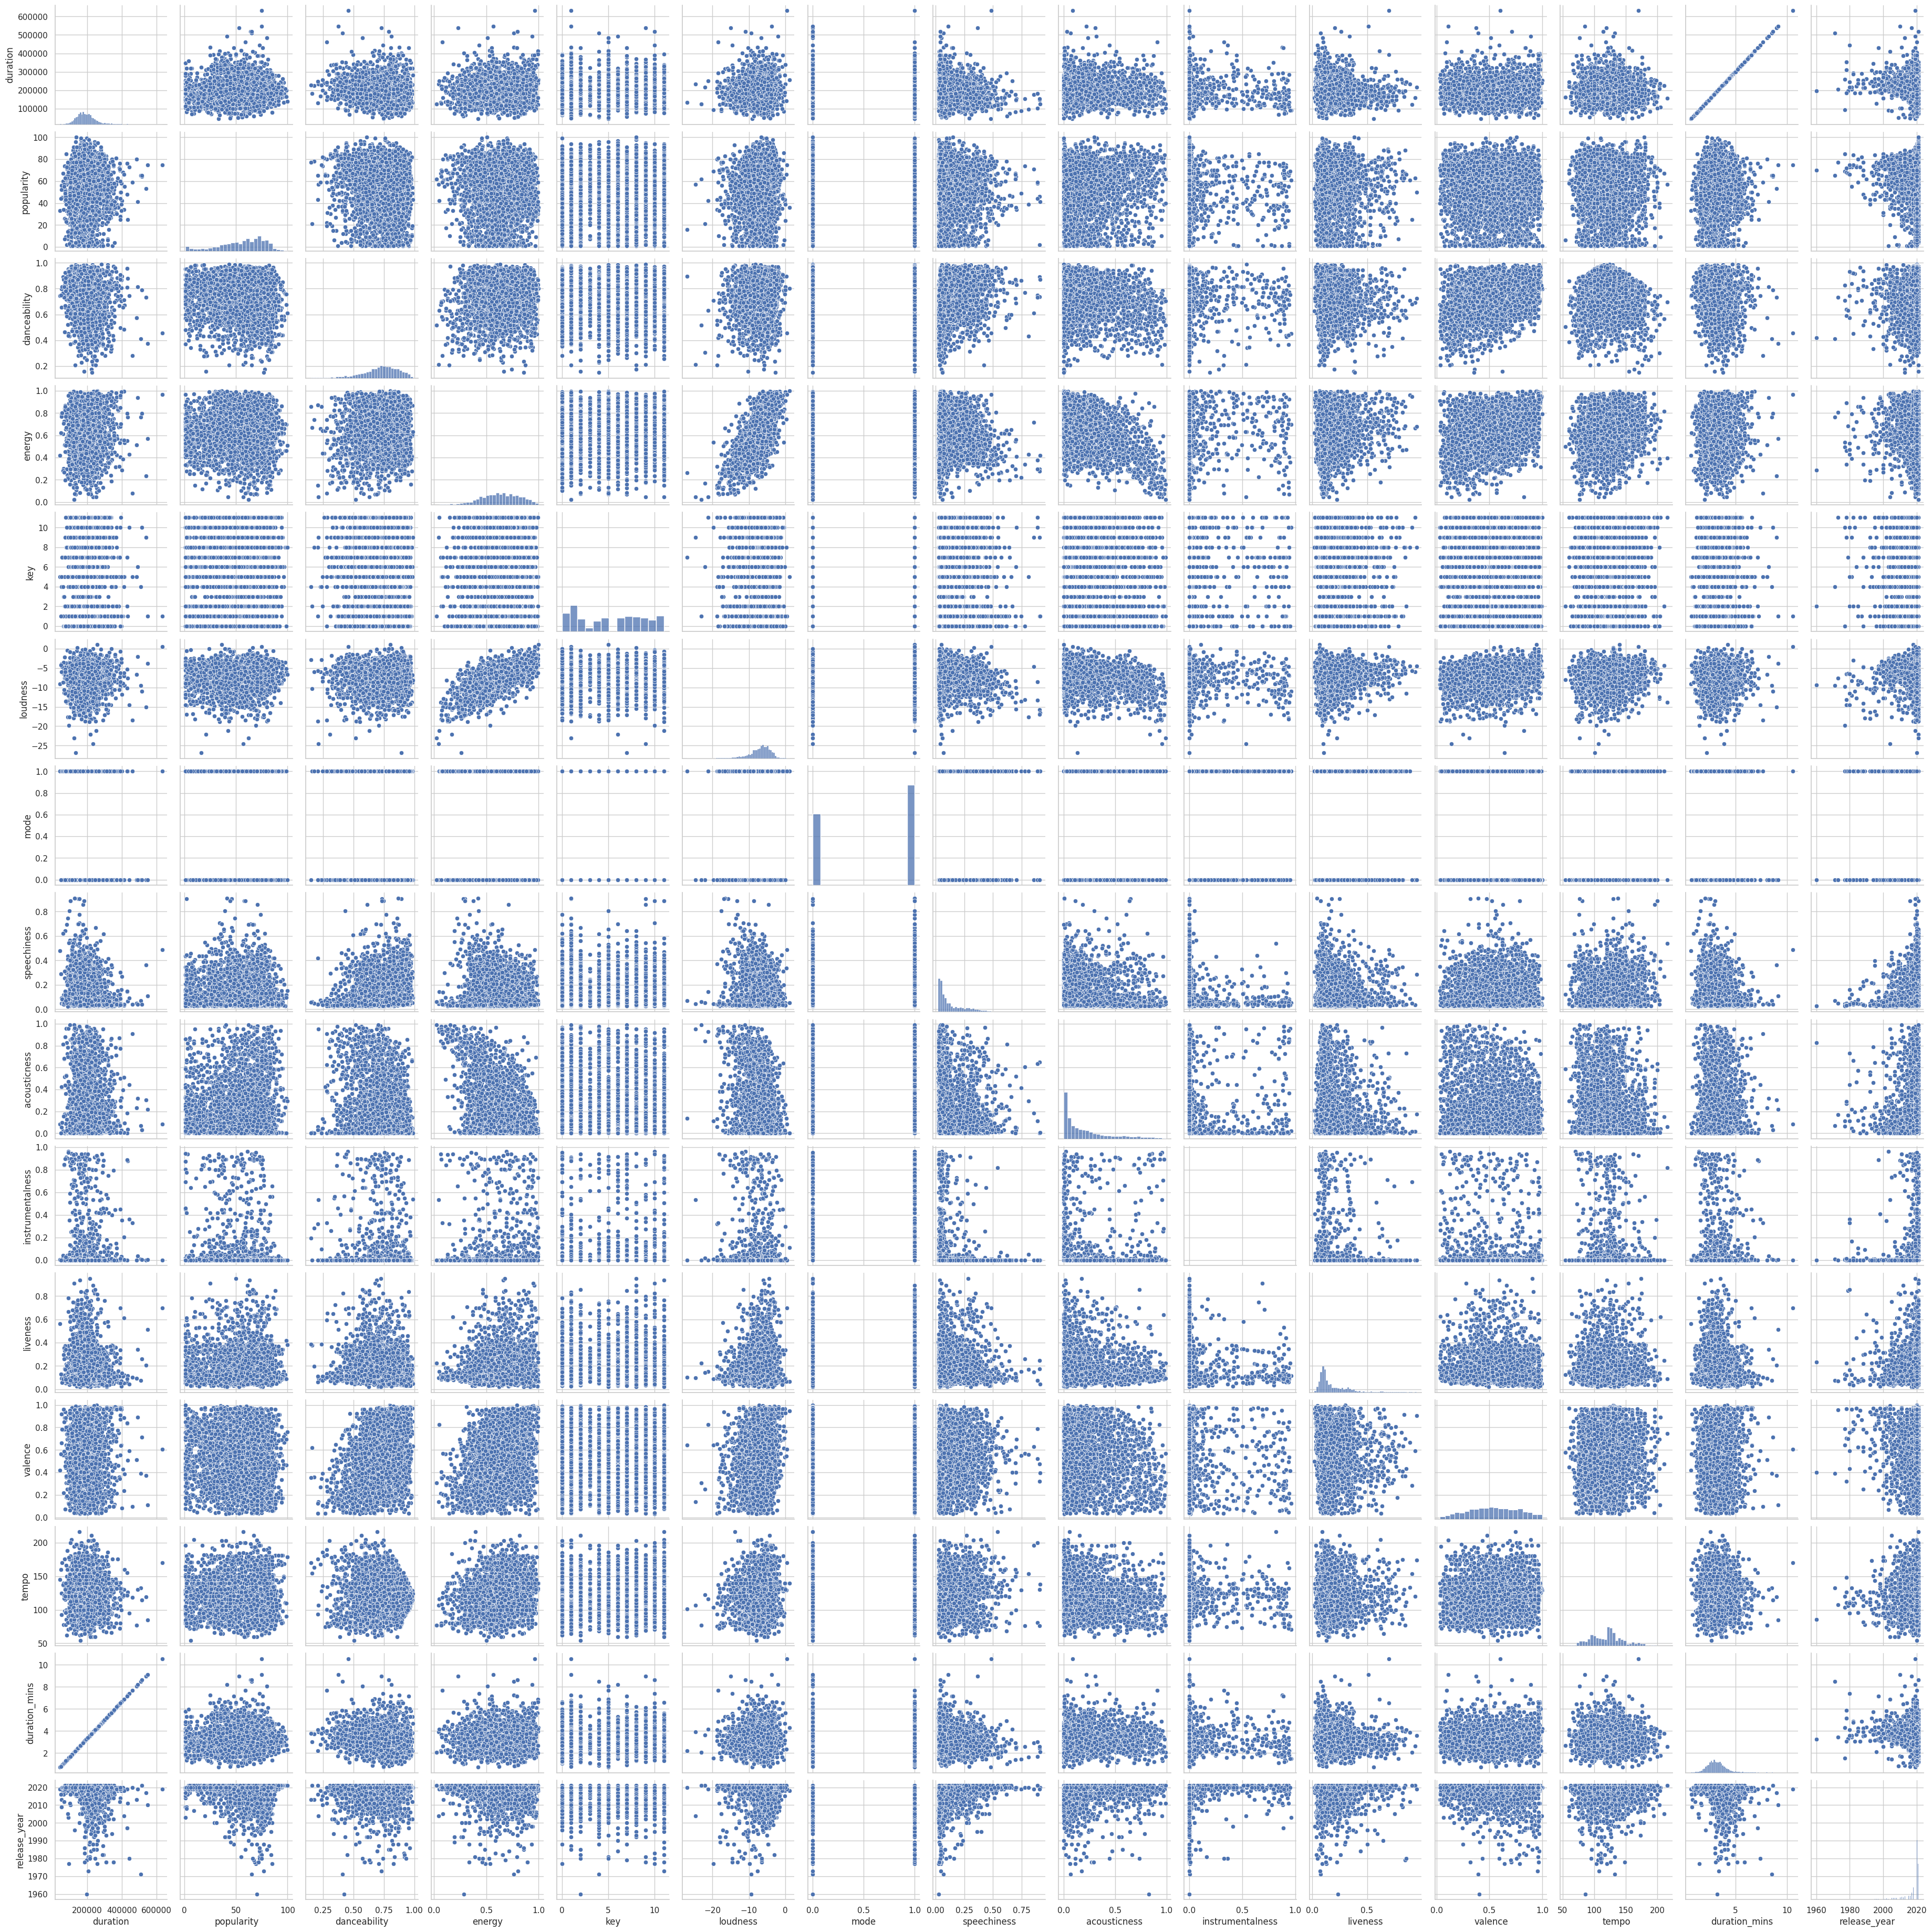

In [14]:
sns.pairplot(numerical_df)

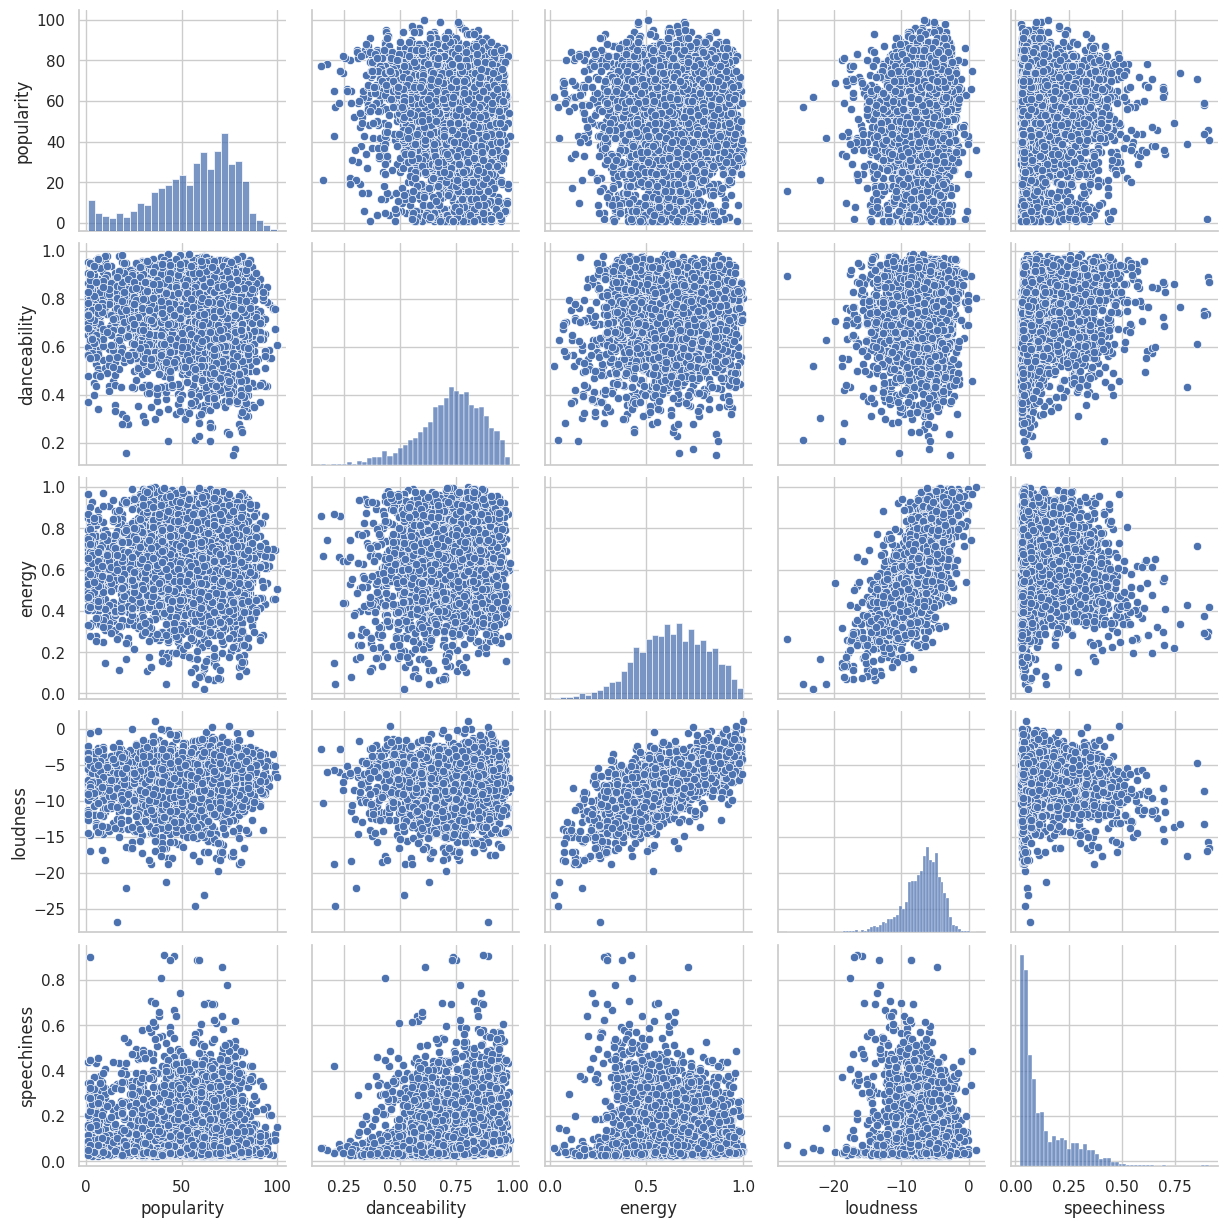

In [15]:
interesting_cols = ['popularity', 'danceability', 'energy', 'loudness', 'speechiness']
song_specs = numerical_df[interesting_cols]

sns.pairplot(song_specs)
# sns.pairplot(song_specs, hue="genre")

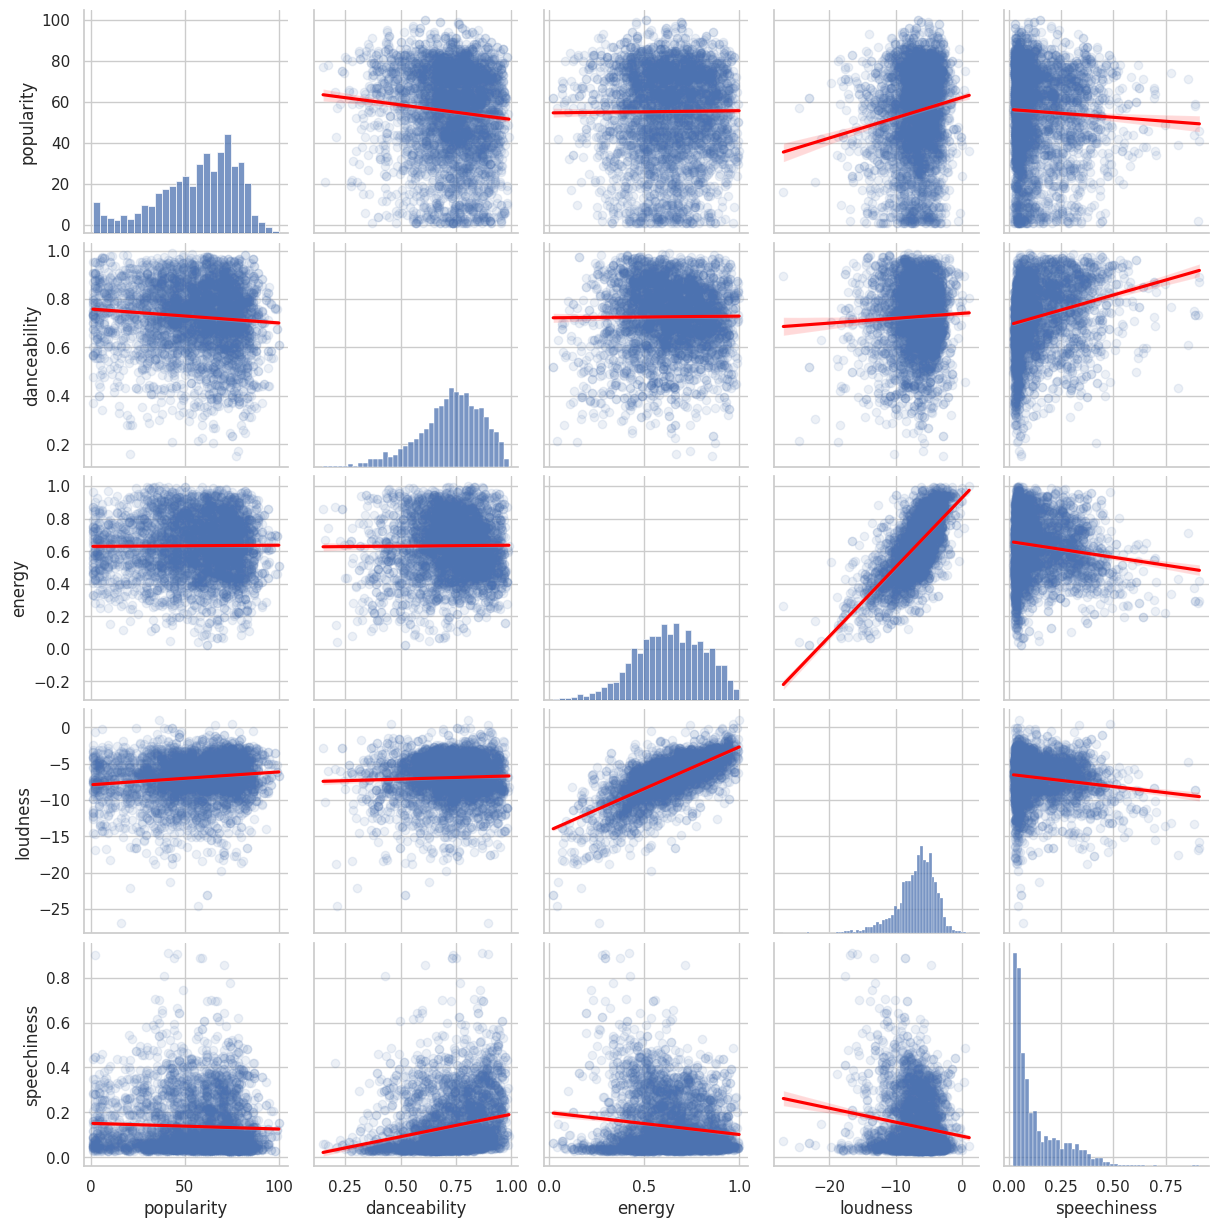

In [16]:
sns.pairplot(numerical_df[interesting_cols], kind="reg", plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}})

<AxesSubplot:>

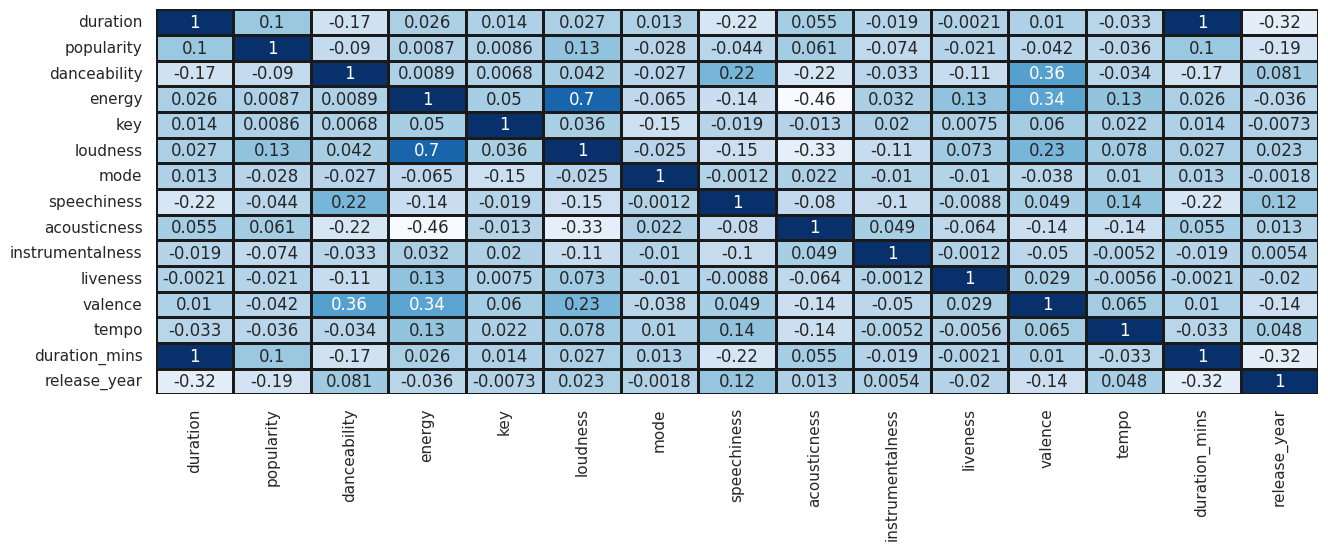

In [17]:
plt.figure(figsize = (15,5))
sns.heatmap(data = numerical_df.corr(), cmap='Blues', cbar=False, annot=True, linecolor='k', linewidths=1)

In [18]:
# Regressão linear simples

X = numerical_df.drop('track_id', axis=1)
Y = numerical_df['popularity']

reg = LinearRegression()
reg.fit(X, Y)

print("O modelo é: Popularidade = {:.5} + {:.5}*duration + {:.5}*danceability + {:.5}*energy + {:.5}*loudness + {:.5}*speechiness + {:.5}*acousticness + {:.5}*instrumentalness + {:.5}*release_year".format(reg.intercept_, reg.coef_[0], reg.coef_[1], reg.coef_[2], reg.coef_[3], reg.coef_[4], reg.coef_[5], reg.coef_[6], reg.coef_[7]))

O modelo é: Popularidade = -1.7906e-12 + 8.9849e-19*duration + 1.0*danceability + 2.8151e-14*energy + 3.3014e-15*loudness + -6.9389e-18*speechiness + 1.7347e-17*acousticness + 4.2501e-16*instrumentalness + -6.7897e-15*release_year


In [19]:
# Avaliando a regressão múltipla

X = np.column_stack((numerical_df['duration'], numerical_df['danceability'], numerical_df['energy'], numerical_df['loudness'],
                     numerical_df['speechiness'], numerical_df['acousticness'], numerical_df['instrumentalness'],
                     numerical_df['release_year']))
y = numerical_df['popularity']


X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()


print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     47.02
Date:                Thu, 01 Dec 2022   Prob (F-statistic):           7.25e-73
Time:                        11:36:01   Log-Likelihood:                -18001.
No. Observations:                4029   AIC:                         3.602e+04
Df Residuals:                    4020   BIC:                         3.608e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1573.4707    123.761     12.714      0.0